# Drawdown

In [1]:
import pandas as pd
me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                     header=0, index_col=0, parse_dates=True, na_values=-99.99
                     )
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


<AxesSubplot:>

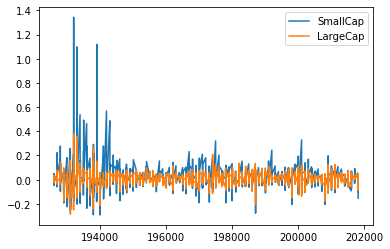

In [2]:
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [3]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [4]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [5]:
rets.index = rets.index.to_period('M')
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [6]:
rets.loc['2008']

,SmallCap,LargeCap
2008-01,-0.0436,-0.0490
2008-02,-0.0203,-0.0250
2008-03,-0.0440,-0.0122
2008-04,0.0027,0.0492
2008-05,0.0286,0.0161
2008-06,-0.0816,-0.1015
2008-07,-0.0079,-0.0140
2008-08,0.0110,0.0087
2008-09,-0.1274,-0.1155
2008-10,-0.2041,-0.1763


In [7]:
rets.describe()

,SmallCap,LargeCap
count,1110.000000,1110.000000
mean,0.017598,0.008870
std,0.106288,0.053900
min,-0.291400,-0.284300
25%,-0.027350,-0.017025
50%,0.010450,0.011400
75%,0.049950,0.037650
max,1.342900,0.377900


## Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value

Let's do this for Large Cap stocks.

<AxesSubplot:>

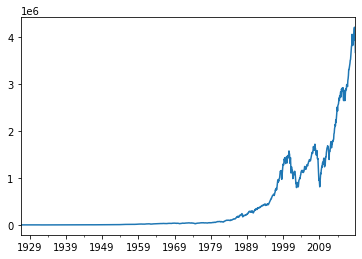

In [8]:
wealth_index = 1000*(1+rets['LargeCap']).cumprod()
wealth_index.plot.line()

<AxesSubplot:>

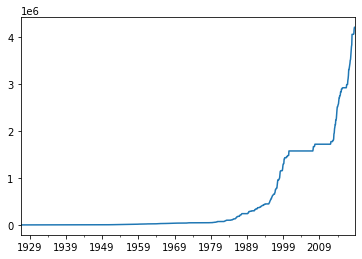

In [9]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot.line()

<AxesSubplot:>

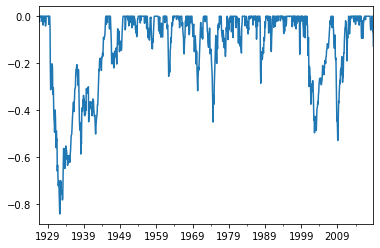

In [10]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [11]:
drawdown.min()

-0.8400375277943123

In [12]:
drawdown['1975':].min()

-0.5280945042309304

In [13]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [14]:
drawdown.idxmin()

Period('1932-05', 'M')

# Creating a Drawdown Function

In [15]:
def drawdown(return_series: pd.Series):
    '''
    This function takes a times series of asset returns.
    It returns a DataFrame with columns containing:
    1. Wealth index
    2. Previous Peaks
    3. Drawdown'''
    
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({'Wealth': wealth_index,
                        'Peaks': previous_peaks,
                        'Drawdown': drawdown
                        })
    

In [16]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [17]:
drawdown(rets["SmallCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,985.500000,985.500000,0.000000
1926-08,1035.957600,1035.957600,0.000000
1926-09,1045.592006,1045.592006,0.000000
1926-10,994.985353,1045.592006,-0.048400
1926-11,987.224467,1045.592006,-0.055822


In [18]:
drawdown(rets["LargeCap"]).idxmin()

Wealth      1932-05
Peaks       1926-07
Drawdown    1932-05
dtype: period[M]

In [19]:
drawdown(rets["SmallCap"]).min()

Wealth      491.240323
Peaks       985.500000
Drawdown     -0.833001
dtype: float64

In [20]:
drawdown(rets["LargeCap"])['Drawdown'].min()

-0.8400375277943123

In [21]:
drawdown(rets["SmallCap"])['Drawdown'].min()

-0.8330007793945303

In [22]:
drawdown(rets["LargeCap"])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [23]:
drawdown(rets["LargeCap"])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [24]:
drawdown(rets["LargeCap"])[['Wealth', 'Peaks']].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot:>

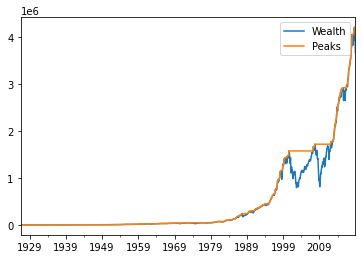

In [25]:
drawdown(rets["LargeCap"])[['Wealth', 'Peaks']].plot()

<AxesSubplot:>

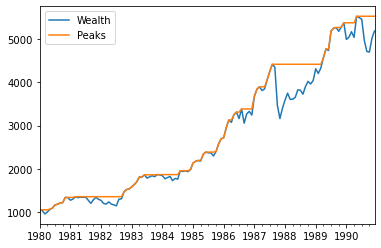

In [26]:
drawdown(rets["LargeCap"]['1980':'1990'])[['Wealth', 'Peaks']].plot()

In [27]:
drawdown(rets["LargeCap"]['1980':'1990'])[['Drawdown']].min()

Drawdown   -0.284689
dtype: float64

In [28]:
drawdown(rets["LargeCap"]['1980':'1990'])[['Drawdown']].idxmin()

Drawdown    1987-11
dtype: period[M]